Base for this notebook: https://colah.github.io/posts/2015-08-Understanding-LSTMs/ <br>
Got the derivatives from: https://medium.com/@aidangomez/let-s-do-this-f9b699de31d9

In [22]:
import numpy as np
import random as rd
from keras.datasets import imdb



In [23]:
def sigmoid(n: float):
    return 1.0/(1.0+np.exp(-n))

def sigmoid_derivative(n: float):
    """Derivative of the sigmoid function."""
    return sigmoid(n)*(1-sigmoid(n))
    
def tanh(n: float):
    return np.tanh(n)
    

In [100]:
x = np.zeros([500,1,1])
w = np.zeros([1,500])
b = np.zeros([500])
sigmoid(np.dot(x[0],w) + b)

array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5

In [24]:
def padding(X):
    maxLen = len(max(X, key=len))
    for i in range(len(X)):
        X[i] = np.pad(X[i], (0 ,maxLen - len(X[i])), 'constant', constant_values=(0, 0))
    return X

In [25]:
maxLen = 500
(train_X, train_y), (test_X, test_y) = imdb.load_data(seed=42, num_words=500, maxlen=maxLen)
train_X = padding(train_X)


In [56]:
print(train_X[2])

[  1  13 244   6 194 337   6   2   2   2   5 207 110  98  32   5  14   9
  31   7   4 118  45 163   2   5   6 356  13 386  14  18  32   2  45  87
  18 117 362  88  45  73   2   5  87  18   2   5   2  88  45 163   5  24
 120   4 350  13 296  12  54  13  16 117   5  13 131 106  12 150  12  47
  87 411  15  61 223   5  13   2  32   4  58   4 116   9  87   5  12 115
 214 154  48  25  40   2   2   5   2  25  80 119  14 207 296 111   6   2
  20  11  61  58   5  14   9   4 118   7  98  32   2   2  13   2 386  14
  20   5  32   4   2   2   2 287  36  32   2   8  32   2   5  26  32   2
   5  55 441   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   

In [133]:
h = np.zeros((500, 1, 500))
h[1]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [136]:
class LSTM:
    
    """
    h = array of outputs
    x = array of inputs
    """
    
    
    def __init__(self, nInputs, nFeatures, nCells, nOutputs, batchSize):
        nGates = 4
        if nCells < nOutputs:
            print('the number of cells cannot be less than the number of outputs')
        
        # [t][i][j], t = timestep, i = which batch, j = which cell or feature
        x = np.zeros((nInputs, batchSize, nFeatures))
        h = np.zeros((nInputs, batchSize, nCells))
        i = np.zeros((nInputs, batchSize, nCells))
        f = np.zeros((nInputs, batchSize, nCells))
        o = np.zeros((nInputs, batchSize, nCells))
        tildeC = np.zeros((nInputs, batchSize, nCells))
        C = np.zeros((nInputs, batchSize, nCells))
        wxScale = 1/np.sqrt(nFeatures*nCells)
        whScale = 1/np.sqrt(nCells*nCells)
        Wxi = np.random.normal(loc=0,scale=wxScale,size=[nFeatures, nCells])
        Wxf = np.random.normal(loc=0,scale=wxScale,size=[nFeatures, nCells])
        Wxc = np.random.normal(loc=0,scale=wxScale,size=[nFeatures, nCells])
        Wxo = np.random.normal(loc=0,scale=wxScale,size=[nFeatures, nCells])
        Whi = np.random.normal(loc=0,scale=wxScale,size=[nCells, nCells])
        Whf = np.random.normal(loc=0,scale=wxScale,size=[nCells, nCells])
        Whc = np.random.normal(loc=0,scale=wxScale,size=[nCells, nCells])
        Who = np.random.normal(loc=0,scale=wxScale,size=[nCells, nCells])
        bi = np.random.normal(loc=0,scale=1,size=[nCells])
        bf = np.random.normal(loc=0,scale=1,size=[nCells])
        bc = np.random.normal(loc=0,scale=1,size=[nCells])
        bo = np.random.normal(loc=0,scale=1,size=[nCells])
        self.x = x
        self.h = h
        self.i = i
        self.f = f
        self.o = o
        self.tildeC = tildeC
        self.C = C
        self.Wxi = Wxi
        self.Wxf = Wxf
        self.Wxc = Wxc
        self.Wxo = Wxo
        self.Whi = Whi
        self.Whf = Whf
        self.Whc = Whc
        self.Who = Who
        self.bi = bi
        self.bf = bf
        self.bc = bc
        self.bo = bo
        self.nCells = nCells
        self.nGates = nGates
        
        
    #the np.array(a) and np.array(b) can be removed after batchSize is implemented
        
    def forgetGate(self, t):
        if t == 0:
            self.f[t] = sigmoid(np.dot(self.x[t], self.Wxf) + self.bf)
        else:
            self.f[t] = sigmoid(np.dot(self.h[t-1], self.Whf) + np.dot(self.x[t], self.Wxf) + self.bf)
        return self.f[t]
    
    def inputGate(self, t):
        if t == 0:
            self.i[t] = sigmoid(np.dot(self.x[t], self.Wxi) + self.bi)
            self.tildeC[t] = tanh(np.dot(self.x[t], self.Wxc) + self.bc) 
        else:
            self.i[t] = sigmoid(np.dot(self.h[t-1], self.Whi) + np.dot(self.x[t], self.Wxi) + self.bi)
            self.tildeC[t] = tanh(np.dot(self.h[t-1], self.Whc) + np.dot(self.x[t], self.Wxc) + self.bc)        
        return self.i[t]*self.tildeC[t]
    
    def outputGate(self, t, newC):
        if t == 0:
            self.o[t] = sigmoid(np.dot(self.x[t], self.Wxo) + self.bo)
        else:
            self.o[t] = sigmoid(np.dot(self.h[t-1], self.Who) + np.dot(self.x[t], self.Wxo) + self.bo)
        self.h[t] = self.o[t]*tanh(newC)
        return self.h[t]
      
    def getNewState(self, t, xElement):
        newC = self.C[t-1]*self.forgetGate(t)
        newC = newC + self.inputGate(t)
        newH = self.outputGate(t, newC)
        return newC, newH
                             
    def setInput(self, x):
        C = 0
        self.x[0] = x[0]
        self.C[0], self.h[0] = self.getNewState(0, x[0])
        for t in range(1, self.nCells):
            self.x[t] = x[t]
            self.C[t], self.h[t] = self.getNewState(t, x[t])
        return 
    
   
    def backProp(self):
        deltaOut = 0
        # a = C~, state = C
        i = self.i
        f = self.f
        C = self.C
        o = self.o
        deltaGates = np.zeros([self.nCells, self.nGates])
        for t in range(nCells, 0, -1):
            delta = h[t] - y[t]
            deltaOut = delta + deltaOut
            deltaState = deltaOut*o[t]*(1 - tanh(C[t])**2) + deltaState[t+1]*f[t+1]
            deltaC = deltaState[t]*i[t]*(1 - C[t]**2)
            deltaI = deltaState[t]*C[t]*i[t]*(1 - i[t])
            deltaF = deltaState[t]*C[t-1]*f[t]*(1 - f[t])
            deltaO = deltaOut[t]*tanh(C[t])*o[t]*(1 - o[t])
            deltaGates[t] = np.array([deltaA[t], deltaI[t], deltaF[t], deltaO[t]])
        
        deltaW = 0
        deltaU = 0
        deltaB = 0
        for t in range(nInputs):
            deltaW += np.outer(deltaGates[t], self.x[t])
            deltaB += deltaGates[t]
            deltaU += np.outer(deltaGates[t+1], self.h[t])
        return deltaW, deltaU, deltaB            
              
                 
    def SGD(self, X: list, y: list, batchSize: int, nEpochs: int, learningRate, lamb):
        """
        Implementation of Stochastic Gradient Descent

        It takes as input the network, the MNIST dataset, the MNIST labels of the dataset, 
        the size of the batch to do gradient descent, the number of epochs it should run,
        the learning rate eta (I found the best eta to be in the order of 1s)
        and the regularization term lambda

        It returns a trained network
        """
        bestAcc = 0
        bestEpoch = 0
        eta = learningRate
        etaChangeEpoch = 0
        for epoch in range(nEpochs):
            batch = rd.sample(range(len(X)), batchSize)
            nablaW = np.zeros(self.nGates)
            nablaU = np.zeros(self.nGates)
            nablaB = np.zeros(self.nGates)
            for i in batch:
                self.setInput(X[i])
                # finding what should be modified based on this particular example
                deltaNablaW, deltaNablaU, deltaNablaB = LSTM.backProp(net, y[i])
                # passing this modifications to our overall modifications matrices
                nablaW += deltaNablaW
                nablaU += deltaNablaU
                nablaB += deltaNablaB

            # applying the changes to our network
            self.b = self.b - eta * (nablaB/batchSize) 
            self.w = self.w - eta * (nablaW/batchSize) - eta * (lamb/batchSize) *  self.w
            self.u = self.u - eta * (nablaU/batchSize) - eta * (lamb/batchSize) *  self.u
            acc, outputs = testNetwork(X, y, nTests=batchSize)
            if acc > bestAcc:
                bestAcc = acc
                bestEpoch = epoch
            print(f'learningRate: {learningRate} epochs: {epoch} acc: {acc}, outputs: {outputs}')
        print(f'best acc: {bestAcc} on epoch: {bestEpoch}')


In [137]:
lstm = LSTM(nInputs=500, nFeatures=1, nCells=500, nOutputs=1, batchSize=1)


lstm.SGD(train_X, train_y, batchSize=100, nEpochs=100, learningRate = 1, lamb = 0)

IndexError: index 499 is out of bounds for axis 0 with size 499

In [268]:
def testNetwork(net: Network, test_X, test_y, nTests: int):
    """
    A function to test our network
    
    It returns the overall accuracy and the numbers our network guessed
    """
    
    correctOutput = 0
    X = test_X[:nTests]
    y = test_y[:nTests]
    outputs = np.zeros(10)
    for i in range(nTests):
        net = setInput(net, X[i])
        networkOutput = np.argmax(net.a[-1])
        outputs[networkOutput] += 1
        #print(f"number: {y[i]}, networkOutput: {networkOutput}, activations: {net.a[-1]}")
        if y[i] == networkOutput:
            correctOutput += 1
    acc = correctOutput/nTests
    return acc, outputs


In [272]:
# initializing the network and the dataset

net = Network([784,30,10])
(train_X, train_y), (test_X, test_y) = mnist.load_data()



In [273]:
net = gridSearch(net, train_X, train_y, test_X, test_y, batchSize=100, learningRates=[1.6], epochs=200, lamb=0)

learningRate: 2 epochs: 0 acc: 0.1, outputs: [ 0.  0. 10.  0.  0.  0.  0.  0.  0.  0.]
learningRate: 2 epochs: 1 acc: 0.0, outputs: [0. 0. 0. 0. 0. 6. 0. 4. 0. 0.]
learningRate: 2 epochs: 2 acc: 0.1, outputs: [ 0.  0. 10.  0.  0.  0.  0.  0.  0.  0.]
learningRate: 2 epochs: 3 acc: 0.0, outputs: [ 0.  0.  0.  0.  0.  0. 10.  0.  0.  0.]
learningRate: 2 epochs: 4 acc: 0.0, outputs: [ 0.  0.  0.  0.  0.  0.  0. 10.  0.  0.]
learningRate: 2 epochs: 5 acc: 0.1, outputs: [0. 0. 0. 0. 6. 0. 0. 0. 4. 0.]
learningRate: 2 epochs: 6 acc: 0.1, outputs: [0. 0. 0. 0. 2. 0. 0. 0. 8. 0.]
learningRate: 2 epochs: 7 acc: 0.1, outputs: [10.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
learningRate: 2 epochs: 8 acc: 0.3, outputs: [0. 1. 0. 0. 9. 0. 0. 0. 0. 0.]
learningRate: 2 epochs: 9 acc: 0.1, outputs: [8. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
learningRate: 2 epochs: 10 acc: 0.2, outputs: [ 0.  0.  0.  0. 10.  0.  0.  0.  0.  0.]
learningRate: 2 epochs: 11 acc: 0.2, outputs: [0. 2. 0. 0. 0. 0. 0. 3. 5. 0.]
learningRate: 

learningRate: 2 epochs: 105 acc: 1.0, outputs: [1. 3. 1. 1. 2. 1. 0. 0. 0. 1.]
learningRate: 2 epochs: 106 acc: 1.0, outputs: [1. 3. 1. 1. 2. 1. 0. 0. 0. 1.]
learningRate: 2 epochs: 107 acc: 0.9, outputs: [1. 3. 1. 2. 2. 0. 0. 0. 0. 1.]
learningRate: 2 epochs: 108 acc: 0.8, outputs: [1. 3. 0. 2. 2. 0. 0. 0. 1. 1.]
learningRate: 2 epochs: 109 acc: 0.9, outputs: [1. 3. 1. 2. 2. 0. 0. 0. 0. 1.]
learningRate: 2 epochs: 110 acc: 0.8, outputs: [1. 3. 1. 2. 3. 0. 0. 0. 0. 0.]
learningRate: 2 epochs: 111 acc: 0.6, outputs: [1. 1. 3. 2. 2. 0. 0. 1. 0. 0.]
learningRate: 2 epochs: 112 acc: 0.8, outputs: [1. 3. 0. 2. 2. 0. 0. 0. 1. 1.]
learningRate: 2 epochs: 113 acc: 0.8, outputs: [1. 3. 0. 2. 2. 0. 0. 0. 1. 1.]
learningRate: 2 epochs: 114 acc: 0.9, outputs: [1. 3. 1. 2. 2. 0. 0. 0. 0. 1.]
learningRate: 2 epochs: 115 acc: 0.9, outputs: [1. 3. 1. 2. 2. 0. 0. 0. 0. 1.]
learningRate: 2 epochs: 116 acc: 0.9, outputs: [1. 3. 1. 2. 2. 0. 0. 0. 0. 1.]
learningRate: 2 epochs: 117 acc: 0.8, outputs: [1. 3

In [274]:
testNetwork(net, test_X, test_y, len(test_X))

(0.7948,
 array([ 892., 1165.,  616., 1402.,  804.,  513., 1151., 1287.,  949.,
        1221.]))

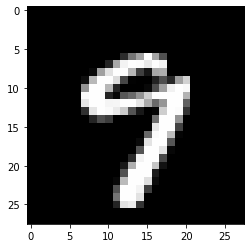

7

In [275]:
# Seeing our network in action

import matplotlib.pyplot as plt

# pick a sample to plot
sample = 50099
image = train_X[sample]
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

net = setInput(net, train_X[sample])
networkOutput = np.argmax(net.a[-1])
networkOutput